In [129]:
from google.colab import drive
drive.mount('/content/gdrive') 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [130]:
import pandas as pd
import numpy as np

In [131]:
data = pd.read_csv("gdrive/My Drive/OCBC Python Project/healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [132]:
data.isnull().values.any()
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [133]:
data = data.dropna()
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [134]:
data['gender'].value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

In [135]:
data = data.drop(data[data.gender =='Other'].index)

In [136]:
data['gender'].value_counts()

Female    2897
Male      2011
Name: gender, dtype: int64

In [137]:
gender_onehot = pd.get_dummies(data['gender'])
data = data.drop('gender',axis = 1)
data = data.join(gender_onehot)
data.head()

,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Female,Male
0,9046,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,0,1
2,31112,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0,1
3,60182,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1,0
4,1665,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1,0
5,56669,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,0,1


In [138]:
data['hypertension'].value_counts()
data['heart_disease'].value_counts()
data['work_type'].value_counts()

Private          2810
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

In [139]:
work_type_onehot = pd.get_dummies(data['work_type'])
data = data.drop('work_type',axis = 1)
data = data.join(work_type_onehot)
data.head()

,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Female,Male,Govt_job,Never_worked,Private,Self-employed,children
0,9046,67.0,0,1,Yes,Urban,228.69,36.6,formerly smoked,1,0,1,0,0,1,0,0
2,31112,80.0,0,1,Yes,Rural,105.92,32.5,never smoked,1,0,1,0,0,1,0,0
3,60182,49.0,0,0,Yes,Urban,171.23,34.4,smokes,1,1,0,0,0,1,0,0
4,1665,79.0,1,0,Yes,Rural,174.12,24.0,never smoked,1,1,0,0,0,0,1,0
5,56669,81.0,0,0,Yes,Urban,186.21,29.0,formerly smoked,1,0,1,0,0,1,0,0


In [140]:
data['ever_married'].value_counts()

Yes    3204
No     1704
Name: ever_married, dtype: int64

In [141]:
ever_married_onehot = pd.get_dummies(data['ever_married'])
data = data.drop('ever_married',axis = 1)
data = data.join(ever_married_onehot)
data.head()

,id,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Female,Male,Govt_job,Never_worked,Private,Self-employed,children,No,Yes
0,9046,67.0,0,1,Urban,228.69,36.6,formerly smoked,1,0,1,0,0,1,0,0,0,1
2,31112,80.0,0,1,Rural,105.92,32.5,never smoked,1,0,1,0,0,1,0,0,0,1
3,60182,49.0,0,0,Urban,171.23,34.4,smokes,1,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,Rural,174.12,24.0,never smoked,1,1,0,0,0,0,1,0,0,1
5,56669,81.0,0,0,Urban,186.21,29.0,formerly smoked,1,0,1,0,0,1,0,0,0,1


In [142]:
data['Residence_type'].value_counts()

Urban    2490
Rural    2418
Name: Residence_type, dtype: int64

In [143]:
Residence_type_onehot = pd.get_dummies(data['Residence_type'])
data = data.drop('Residence_type',axis = 1)
data = data.join(Residence_type_onehot)
data.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,Female,Male,Govt_job,Never_worked,Private,Self-employed,children,No,Yes,Rural,Urban
0,9046,67.0,0,1,228.69,36.6,formerly smoked,1,0,1,0,0,1,0,0,0,1,0,1
2,31112,80.0,0,1,105.92,32.5,never smoked,1,0,1,0,0,1,0,0,0,1,1,0
3,60182,49.0,0,0,171.23,34.4,smokes,1,1,0,0,0,1,0,0,0,1,0,1
4,1665,79.0,1,0,174.12,24.0,never smoked,1,1,0,0,0,0,1,0,0,1,1,0
5,56669,81.0,0,0,186.21,29.0,formerly smoked,1,0,1,0,0,1,0,0,0,1,0,1


In [144]:
data['smoking_status'].value_counts()

never smoked       1852
Unknown            1483
formerly smoked     836
smokes              737
Name: smoking_status, dtype: int64

In [145]:
smoking_status_onehot = pd.get_dummies(data['smoking_status'])
data = data.drop('smoking_status',axis = 1)
data = data.join(smoking_status_onehot)
data.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Male,Govt_job,Never_worked,Private,Self-employed,children,No,Yes,Rural,Urban,Unknown,formerly smoked,never smoked,smokes
0,9046,67.0,0,1,228.69,36.6,1,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0
2,31112,80.0,0,1,105.92,32.5,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0
5,56669,81.0,0,0,186.21,29.0,1,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0


In [146]:
x_data = data.loc[:, ~data.columns.isin(['id', 'stroke'])]
y_data = data['stroke'] 

In [147]:
x_data.head()
y_data.head()

0    1
2    1
3    1
4    1
5    1
Name: stroke, dtype: int64

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state = 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3435, 20) (1473, 20) (3435,) (1473,)


In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [150]:
log_reg_model = LogisticRegression(solver='liblinear', random_state=0)
log_reg_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [151]:
log_reg_pred = log_reg_model.predict_proba(X_test)
log_reg_score = log_reg_model.score(X_test, y_test)

In [152]:
log_reg_pred
log_reg_score
print("Accuracy is " + str(log_reg_score))

Accuracy is 0.956551255940258


In [153]:
log_reg_cm = confusion_matrix(y_test, log_reg_model.predict(X_test))
log_reg_cm

array([[1409,    0],
       [  64,    0]])

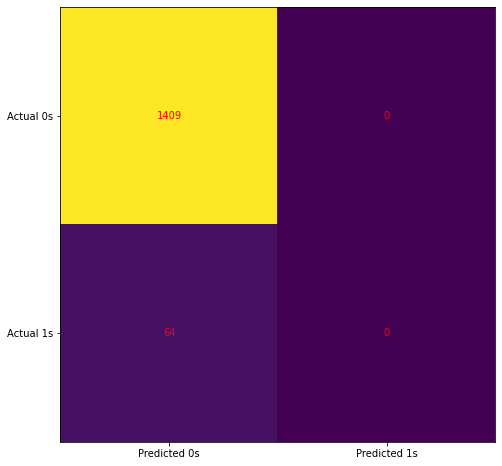

In [154]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(log_reg_cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, log_reg_cm[i, j], ha='center', va='center', color='red')
plt.show()